<a href="https://colab.research.google.com/github/akiddd37/AI-Group-Project-Oct-25/blob/main/AIProject(dense121).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/AI Oct 25

Mounted at /content/drive/
/content/drive/My Drive/AI Oct 25


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
import shutil
import os

# 1. Define source (Drive) and destination (Colab Local)
source_dir = '/content/drive/My Drive/AI Oct 25/dataset/full'
local_dir = '/content/fast_dataset'

# 2. Check if already copied to save time
if not os.path.exists(local_dir):
    print("🚀 Copying data to local runtime for speed... (This takes 1-2 mins)")
    shutil.copytree(source_dir, local_dir)
    print("✅ Copy complete! Training will be fast now.")
else:
    print("✅ Data already on local disk.")

# 3. UPDATE PATHS to point to the new local folder
train_path = os.path.join(local_dir, 'train')
valid_path = os.path.join(local_dir, 'valid')
test_path  = os.path.join(local_dir, 'test')



🚀 Copying data to local runtime for speed... (This takes 1-2 mins)
✅ Copy complete! Training will be fast now.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- SETUP GENERATORS (DenseNet121 Version) ---

# 1. Training Data
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input) \
    .flow_from_directory(directory=train_path,
                         target_size=(224, 224),
                         batch_size=32)

# 2. Validation Data
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input) \
    .flow_from_directory(directory=valid_path,
                         target_size=(224, 224),
                         batch_size=32)

# 3. Test Data
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input) \
    .flow_from_directory(directory=test_path,
                         target_size=(224, 224),
                         batch_size=32,
                         shuffle=False) # Keep False for Confusion Matrix

Found 6971 images belonging to 10 classes.
Found 1988 images belonging to 10 classes.
Found 1006 images belonging to 10 classes.


In [ ]:
imgs , labels = next(train_batches)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plotImages(images_arr, labels_arr=None):
    # Limit to 10 images max so the plot doesn't get too tiny
    count = min(len(images_arr), 10)

    fig, axes = plt.subplots(1, count, figsize=(20, 20))
    axes = axes.flatten()

    for i in range(count):
        img = images_arr[i]
        ax = axes[i]

        # --- FIX COLORS FOR DISPLAY ---
        img_display = (img - img.min()) / (img.max() - img.min())

        ax.imshow(img_display)
        ax.axis('off')

        # Show the class label if provided
        if labels_arr is not None:
            # Check which index is '1' (e.g., [0, 1, 0, 0...])
            class_index = np.argmax(labels_arr[i])
            ax.set_title(f"Class: {class_index}")

    plt.tight_layout()
    plt.show()

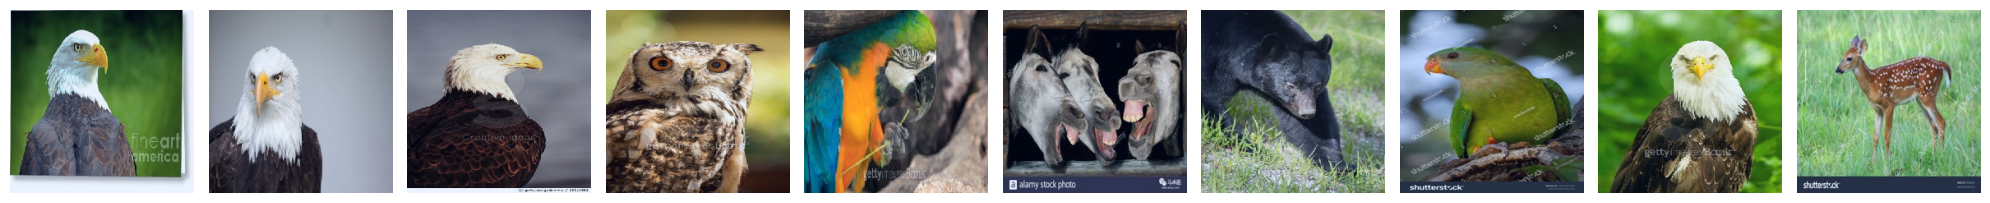

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0.

In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
import tensorflow as tf

# 1. Load DenseNet121
densenet_model = tf.keras.applications.DenseNet121(
    weights='imagenet',       # Pre-trained on 1000 objects
    include_top=False,
    input_shape=(224, 224, 3)
)

# 2. Freeze the Brain
densenet_model.trainable = False

# 3. Build the Full Model
model = tf.keras.Sequential([

    # Use DenseNet's specific color fixer.
    tf.keras.layers.Lambda(tf.keras.applications.densenet.preprocess_input, input_shape=(224, 224, 3)),

    # The DenseNet Base
    densenet_model,

    # Custom Classifier
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax') # 10 Animal Classes
])

model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,047,754 (26.89 MB)

 Trainable params: 10,250 (40.04 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Use AUC (Area Under Curve) with curve='PR' (Precision-Recall).
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(curve='PR', name='mAP')
    ]
)

In [ ]:
history1 = model.fit(x=train_batches, steps_per_epoch = len(train_batches), validation_data = valid_batches, validation_steps=len(valid_batches),
         epochs = 50, verbose =2)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


218/218 - 89s - 407ms/step - accuracy: 0.1651 - loss: 2.2717 - mAP: 0.1453 - val_accuracy: 0.2661 - val_loss: 2.1267 - val_mAP: 0.2444
Epoch 2/50
218/218 - 26s - 119ms/step - accuracy: 0.3612 - loss: 1.9795 - mAP: 0.3643 - val_accuracy: 0.3944 - val_loss: 1.9100 - val_mAP: 0.4058
Epoch 3/50
218/218 - 22s - 101ms/step - accuracy: 0.4638 - loss: 1.7938 - mAP: 0.4873 - val_accuracy: 0.4824 - val_loss: 1.7623 - val_mAP: 0.5031
Epoch 4/50
218/218 - 22s - 99ms/step - accuracy: 0.5219 - loss: 1.6647 - mAP: 0.5569 - val_accuracy: 0.5186 - val_loss: 1.6552 - val_mAP: 0.5565
Epoch 5/50
218/218 - 21s - 98ms/step - accuracy: 0.5530 - loss: 1.5665 - mAP: 0.6017 - val_accuracy: 0.5402 - val_loss: 1.5734 - val_mAP: 0.5930
Epoch 6/50
218/218 - 22s - 101ms/step - accuracy: 0.5762 - loss: 1.4901 - mAP: 0.6341 - val_accuracy: 0.5659 - val_loss: 1.5073 - val_mAP: 0.6162
Epoch 7/50
218/218 - 41s - 189ms/step - accuracy: 0.5927 - loss: 1.4273 - mAP: 0.6587 - val_accuracy: 0.5755 - val_loss: 1.4537 - val_mAP

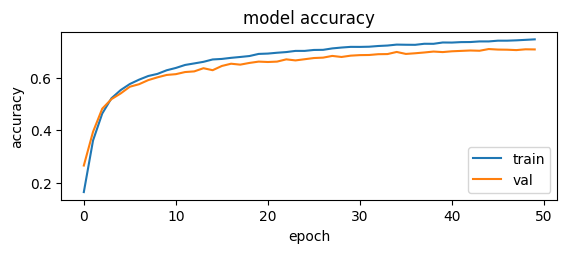

In [ ]:
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

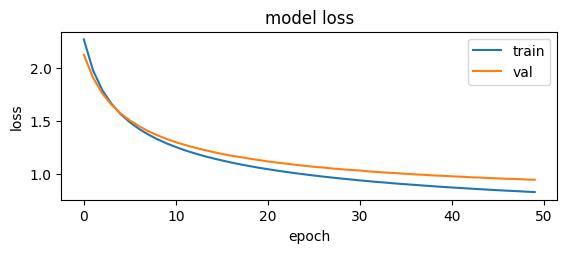

In [ ]:
plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

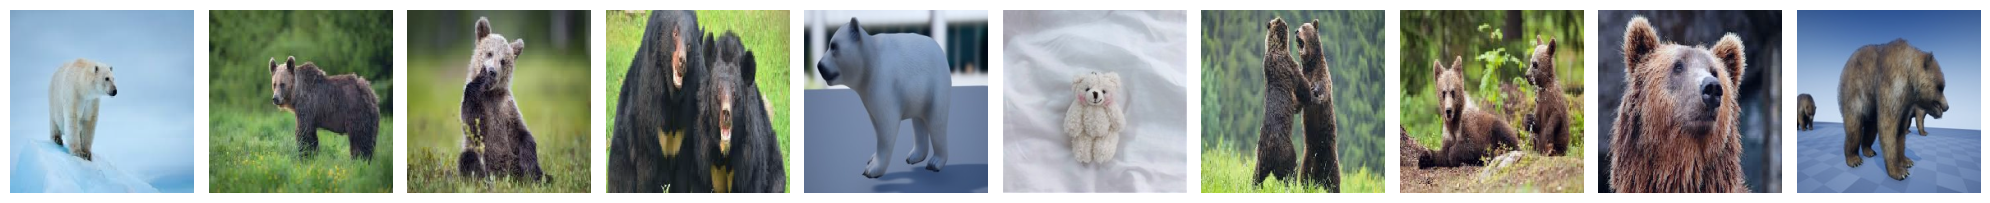

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis = -1))

In [ ]:
def plot_confusion_matrix(cm,classes,
                         normalize = False, title = 'Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
test_batches.class_indices

{'bear': 0,
 'deer': 1,
 'eagle': 2,
 'elephant': 3,
 'fox': 4,
 'horse': 5,
 'monkey': 6,
 'owl': 7,
 'parrot': 8,
 'tiger': 9}

Confusion matrix, without normalization
[[48  3  1  4  5  2 14  0  0  1]
 [ 1 74  0  6  7  8  8  2  1  0]
 [ 1  4 73  2  0  2  3  3  5  0]
 [ 1  5  0 77  1  4  0  0  3  0]
 [ 0 14  2  2 52  5 10  0  2  2]
 [ 2 11  6  9  3 70  9  4  0  1]
 [ 4  7  2  3  3  1 76  4  1  1]
 [ 2  9  6  2  3  2 10 61  3  2]
 [ 0  1  2  0  2  3  5  5 97  0]
 [ 1 12  0  0  3  1  7  1  0 91]]


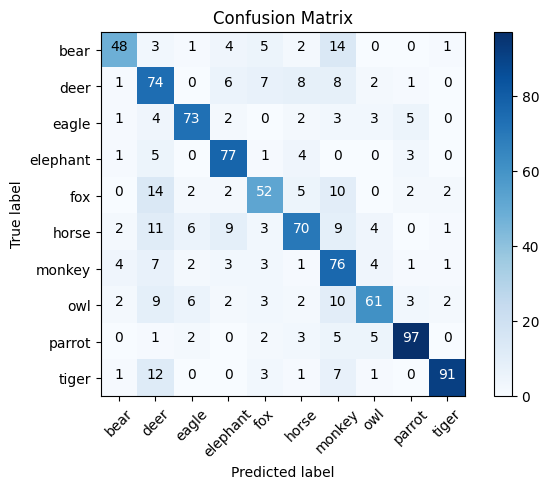

In [ ]:
cm_plot_labels = ['bear','deer','eagle','elephant','fox','horse','monkey','owl','parrot','tiger']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
loss, acc, mAP = model.evaluate(test_imgs, test_labels, batch_size=10)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4792 - loss: 1.4709 - mAP: 0.5474


In [ ]:
loss, acc, mAP = model.evaluate(test_imgs, test_labels, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5312 - loss: 1.3723 - mAP: 0.6029
